<a href="https://colab.research.google.com/github/Auliaafnc/Artificial-Intelligence/blob/main/UAS_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Nama**  : Aulia Fitri Nur Cahyati  
#### **NIM**   : 20220801148  
#### **Mata Kuliah** : IND323 Artificial Intelligence CR001  
#### **Dosen Pengampu** : Wisnu Indrawan, S.Si., M.T  

# **Langkah 1: Preprocessing Data**




Saving netflix_titles.csv to netflix_titles (12).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


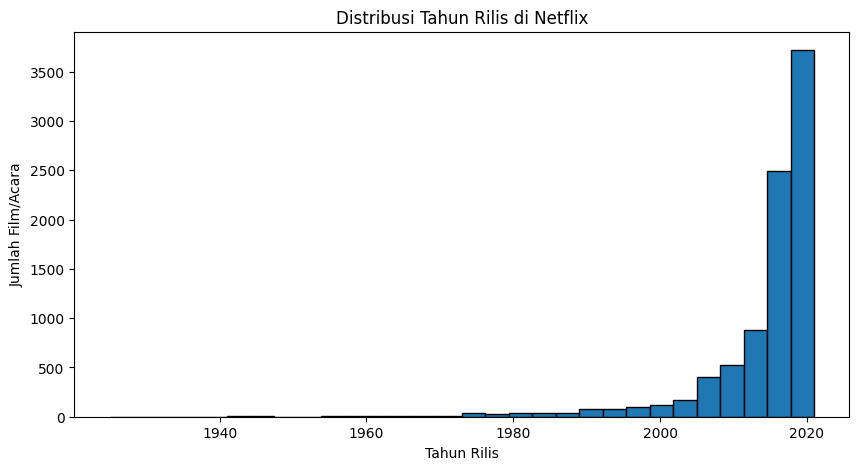

<class 'pandas.core.frame.DataFrame'>
Index: 8794 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8794 non-null   object
 1   type          8794 non-null   object
 2   title         8794 non-null   object
 3   director      8794 non-null   object
 4   cast          8794 non-null   object
 5   country       8794 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8794 non-null   int64 
 8   rating        8794 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8794 non-null   object
 11  description   8794 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.1+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [59]:

# Google Colab Notebook untuk Preprocessing Data Netflix

# Langkah 1: Preprocessing Data

# 1. Import Library
import pandas as pd
import matplotlib.pyplot as plt

# 2. Load Dataset
from google.colab import files
uploaded = files.upload()

# Membaca dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# 3. Menampilkan Informasi Awal Dataset
df.info()
df.head()

# 4. Menangani Missing Values
# Mengisi missing values dengan 'Unknown' untuk kolom kategorikal
df = df.copy()
df.loc[:, 'director'] = df['director'].fillna('Unknown')
df.loc[:, 'cast'] = df['cast'].fillna('Unknown')
df.loc[:, 'country'] = df['country'].fillna('Unknown')
df.loc[:, 'rating'] = df['rating'].fillna('Unknown')

# Menghapus baris dengan missing values pada kolom penting secara kronologis
df = df.dropna(subset=['date_added', 'duration'])

# 5. Memeriksa Distribusi Tahun Rilis
plt.figure(figsize=(10,5))
plt.hist(df['release_year'], bins=30, edgecolor='black')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Film/Acara')
plt.title('Distribusi Tahun Rilis di Netflix')
plt.show()

# 6. Transformasi Data
# Membersihkan spasi ekstra di kolom date_added
df.loc[:, 'date_added'] = df['date_added'].str.strip()

# Konversi date_added ke datetime
df.loc[:, 'date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Konversi duration menjadi angka (menit untuk film, jumlah musim untuk TV Show)
def convert_duration(duration):
    if 'Season' in duration:
        return int(duration.split()[0])  # Mengambil angka jumlah musim
    elif 'min' in duration:
        return int(duration.split()[0])  # Mengambil angka durasi dalam menit
    return 0

df.loc[:, 'duration'] = df['duration'].apply(convert_duration)

# 7. Menampilkan Data Setelah Preprocessing
df.info()
df.head()

# **Langkah 2: Clustering dengan K-Means**

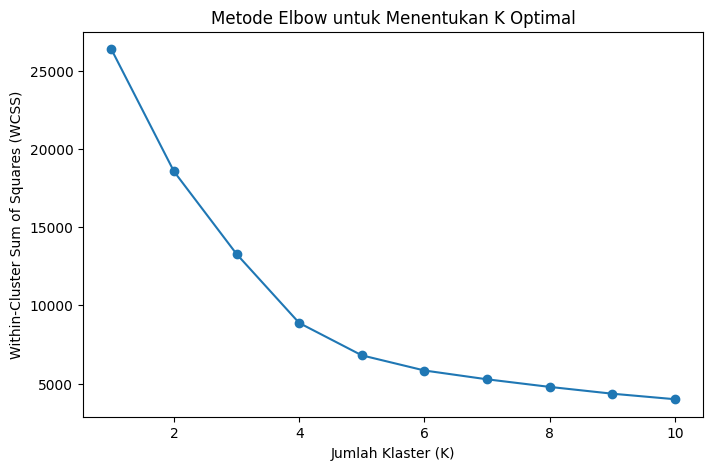

Hasil clustering disimpan dalam 'netflix_clustered_final.csv'


,title,release_year,duration,country,cluster
0,Dick Johnson Is Dead,2020,90,United States,3
1,Blood & Water,2021,2,South Africa,1
2,Ganglands,2021,1,Unknown,1
3,Jailbirds New Orleans,2021,1,Unknown,1
4,Kota Factory,2021,2,India,1


In [46]:
# Langkah 2: Clustering dengan K-Means

# Import Library
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load Dataset yang sudah diproses
df = pd.read_csv('netflix_clustered.csv')

# Memilih fitur untuk clustering
features = df[['release_year', 'duration']].copy()

# Encoding country sebagai fitur numerik (opsional)
if 'country' in df.columns:
    label_encoder = LabelEncoder()
    features['country_encoded'] = label_encoder.fit_transform(df['country'])

# Normalisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Menentukan jumlah klaster menggunakan Elbow Method
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Menampilkan grafik Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()

# Menjalankan K-Means dengan jumlah klaster optimal (misalnya K=4)
k_optimal = 4  # Sesuaikan dengan hasil elbow method
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Menyimpan Hasil Klaster
df.to_csv('netflix_clustered_final.csv', index=False)
print("Hasil clustering disimpan dalam 'netflix_clustered_final.csv'")

# Menampilkan Informasi Hasil Clustering
df[['title', 'release_year', 'duration', 'country', 'cluster']].head()


# **Langkah 3: Penggabungan dengan Machine Learning**

In [49]:
# Langkah 3: Penggabungan dengan Machine Learning

# Import Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Load Dataset yang sudah diklaster
df = pd.read_csv('netflix_clustered_final.csv')

# Memilih fitur dan target
X = df[['release_year', 'duration', 'cluster']].copy()

# Encoding country sebagai fitur numerik (opsional)
if 'country' in df.columns:
    label_encoder = LabelEncoder()
    X['country_encoded'] = label_encoder.fit_transform(df['country'])

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tentukan target (contoh: klasifikasi berdasarkan rating)
if 'rating' in df.columns:
    y = label_encoder.fit_transform(df['rating'])  # Mengonversi rating menjadi label numerik
else:
    raise ValueError("Dataset tidak memiliki kolom 'rating' untuk dijadikan target.")

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Melatih model Logistic Regression
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi Kinerja Model dengan zero_division untuk menghindari warning
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Menampilkan Hasil Evaluasi
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)


Accuracy: 0.4002
Confusion Matrix:
 [[  0   0   0   3   3   0   0   2   0   0   0]
 [  0   0   0   0   0   5   0  15   0   0   0]
 [  0   0   0   0  15   6   0  30   0   0   0]
 [  0   0   0   1  34  19   0  47   0   0   0]
 [  0   0   0   2  42  24   0 105   0   0   0]
 [  0   0   3   4  12  94   0 310   0   0   0]
 [  0   0   1   1   0   2   0  38   0   0   0]
 [  0   0   1   3  17  48   0 567   0   0   0]
 [  0   0   6   2   1  32   0 147   0   0   0]
 [  0   0   0   0   0   1   0  60   0   0   0]
 [  0   0   0   0   2   5   0  49   0   0   0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         8
           2       1.00      0.00      0.00        20
           3       0.00      0.00      0.00        51
           4       0.06      0.01      0.02       101
           5       0.33      0.24      0.28       173
           6       0.40      0.22      0.29       423
           7       1.00      0.00      0.00

# **Langkah 4: Evaluasi dan Pengoptimalan**

Evaluasi Model Sebelum Optimasi:
Accuracy: 0.4167
Confusion Matrix:
 [[  0   0   0   0   0   3   3   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   2   2   0  11   0   0   0   0   0   0]
 [  0   0   0   0   1  18   3   0  35   0   0   0   0   0   0]
 [  0   0   0   0   1  36  14   0  47   0   0   0   0   0   0]
 [  0   0   0   0   1  42  25   0  92   0   0   0   0   0   0]
 [  1   0   0   2   0  15  96   0 317   0   0   0   0   0   0]
 [  0   0   0   0   0   1   4   0  37   2   0   0   0   0   0]
 [  0   0   0   0   1  13  33   0 594   0   0   0   0   0   0]
 [  0   0   0   2   1   3  20   0 146   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0  60   0   0   0   0   0   0]
 [  0   0   0   0   0   1   3   0  61   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0

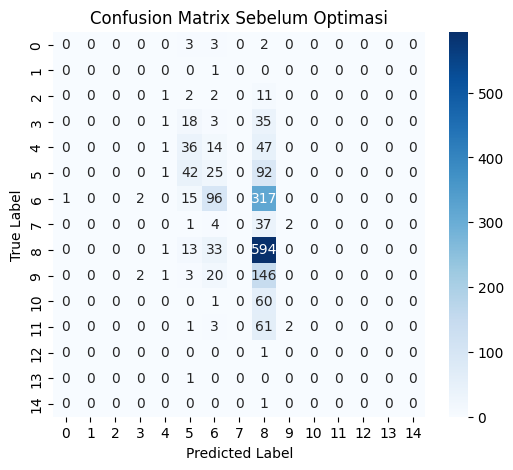

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(



Evaluasi Model Setelah Optimasi:
Accuracy: 0.4167
Confusion Matrix:
 [[  0   0   0   0   0   3   3   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   2   2   0  11   0   0   0   0   0   0]
 [  0   0   0   0   1  18   3   0  35   0   0   0   0   0   0]
 [  0   0   0   0   1  36  14   0  47   0   0   0   0   0   0]
 [  0   0   0   0   1  42  25   0  92   0   0   0   0   0   0]
 [  1   0   0   2   0  15  96   0 317   0   0   0   0   0   0]
 [  0   0   0   0   0   1   4   0  37   2   0   0   0   0   0]
 [  0   0   0   0   1  13  33   0 594   0   0   0   0   0   0]
 [  0   0   0   2   1   3  20   0 146   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0  60   0   0   0   0   0   0]
 [  0   0   0   0   0   1   3   0  61   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   

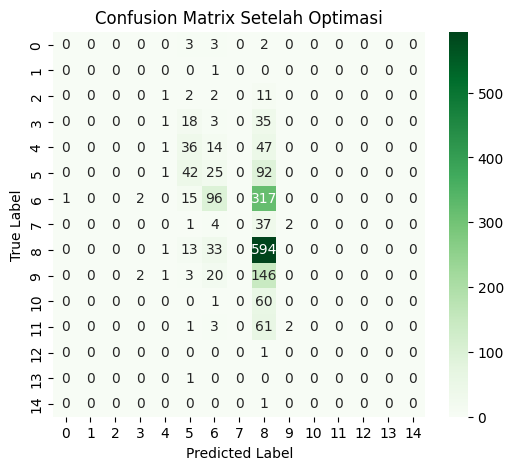


Evaluasi Model Tanpa Clustering:
Accuracy: 0.4042
Confusion Matrix:
 [[  0   0   0   0   0   0   6   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   1   4   0  10   0   0   0   0   0   0]
 [  0   0   0   0   1  10  12   0  34   0   0   0   0   0   0]
 [  0   0   0   0   1  37  14   0  46   0   0   0   0   0   0]
 [  0   0   0   0   1  38  29   0  92   0   0   0   0   0   0]
 [  3   0   0   0   0  17  75   0 336   0   0   0   0   0   0]
 [  0   0   0   0   0   2   6   0  36   0   0   0   0   0   0]
 [  0   0   0   0   2   5  37   0 597   0   0   0   0   0   0]
 [  2   0   0   0   1   7  13   0 149   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0  60   0   0   0   0   0   0]
 [  0   0   0   0   0   0   6   0  61   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   

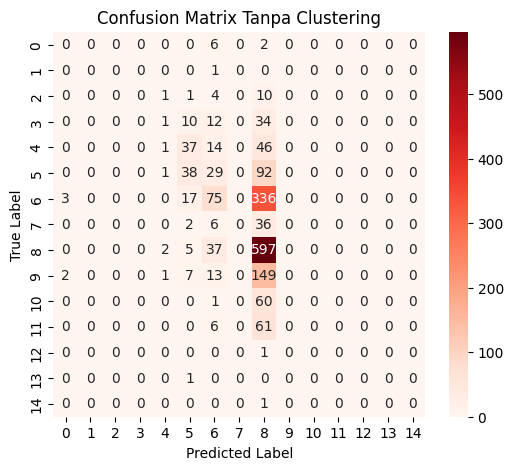


Kesimpulan:
1. Akurasi model sebelum optimasi: 0.4167
2. Akurasi model setelah optimasi: 0.4167
3. Akurasi model tanpa clustering: 0.4042
4. Jika model dengan clustering lebih akurat, maka pengelompokan berdasarkan karakteristik tertentu (misalnya tahun rilis dan durasi) membantu dalam prediksi rating.
5. Jika hasil model tanpa clustering lebih baik, maka clustering mungkin tidak memberikan informasi tambahan yang signifikan.
6. Penggunaan GridSearchCV dan StratifiedKFold membantu meningkatkan performa model dengan menemukan parameter terbaik.


In [57]:
# Langkah 4: Evaluasi dan Pengoptimalan

# Import Library
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Load Dataset yang sudah diklaster
df = pd.read_csv('netflix_clustered_final.csv')

# Memilih fitur dan target
X = df[['release_year', 'duration', 'cluster']].copy()

# Encoding country sebagai fitur numerik (opsional)
if 'country' in df.columns:
    label_encoder = LabelEncoder()
    X['country_encoded'] = label_encoder.fit_transform(df['country'])

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tentukan target (contoh: klasifikasi berdasarkan rating)
if 'rating' in df.columns:
    y = label_encoder.fit_transform(df['rating'])  # Mengonversi rating menjadi label numerik
else:
    raise ValueError("Dataset tidak memiliki kolom 'rating' untuk dijadikan target.")

# Menyesuaikan jumlah split untuk StratifiedKFold agar minimal 2 splits dan tidak melebihi kelas terkecil
n_splits = max(2, min(3, np.min(np.bincount(y))))
cv_strategy = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Evaluasi Model Awal
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

print("Evaluasi Model Sebelum Optimasi:")
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

# Visualisasi Confusion Matrix sebelum optimasi
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Sebelum Optimasi')
plt.show()

# Pengoptimalan Hyperparameter dengan GridSearchCV dan StratifiedKFold
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=200), param_grid, cv=cv_strategy, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Model terbaik setelah tuning
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluasi Model Setelah Optimasi
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best, zero_division=1)

print("\nEvaluasi Model Setelah Optimasi:")
print(f'Accuracy: {accuracy_best:.4f}')
print('Confusion Matrix:\n', conf_matrix_best)
print('Classification Report:\n', classification_rep_best)

# Visualisasi Confusion Matrix setelah optimasi
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Setelah Optimasi')
plt.show()

# Bandingkan dengan Model Tanpa Clustering
X_no_cluster = df[['release_year', 'duration']].copy()
if 'country' in df.columns:
    X_no_cluster['country_encoded'] = label_encoder.fit_transform(df['country'])
X_no_cluster_scaled = scaler.fit_transform(X_no_cluster)

X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(X_no_cluster_scaled, y, test_size=0.2, random_state=42, stratify=y)

model_no_cluster = LogisticRegression(random_state=42, max_iter=200)
model_no_cluster.fit(X_train_nc, y_train_nc)
y_pred_nc = model_no_cluster.predict(X_test_nc)

accuracy_nc = accuracy_score(y_test_nc, y_pred_nc)
conf_matrix_nc = confusion_matrix(y_test_nc, y_pred_nc)
classification_rep_nc = classification_report(y_test_nc, y_pred_nc, zero_division=1)

print("\nEvaluasi Model Tanpa Clustering:")
print(f'Accuracy: {accuracy_nc:.4f}')
print('Confusion Matrix:\n', conf_matrix_nc)
print('Classification Report:\n', classification_rep_nc)

# Visualisasi Confusion Matrix tanpa clustering
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_nc, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Tanpa Clustering')
plt.show()

# Kesimpulan
print("\nKesimpulan:")
print(f"1. Akurasi model sebelum optimasi: {accuracy:.4f}")
print(f"2. Akurasi model setelah optimasi: {accuracy_best:.4f}")
print(f"3. Akurasi model tanpa clustering: {accuracy_nc:.4f}")
print("4. Jika model dengan clustering lebih akurat, maka pengelompokan berdasarkan karakteristik tertentu (misalnya tahun rilis dan durasi) membantu dalam prediksi rating.")
print("5. Jika hasil model tanpa clustering lebih baik, maka clustering mungkin tidak memberikan informasi tambahan yang signifikan.")
print("6. Penggunaan GridSearchCV dan StratifiedKFold membantu meningkatkan performa model dengan menemukan parameter terbaik.")


# **Analisis Menggabungkan Clustering dengan Machine Learning pada Dataset Netflix**


## **Pendahuluan**
Netflix adalah salah satu layanan streaming terbesar di dunia yang menyediakan berbagai film dan acara TV dari berbagai genre dan negara. Dengan pertumbuhan kontennya yang pesat, analisis data menjadi penting untuk memahami tren perilisan, durasi tontonan, dan pola distribusi konten di platform ini. Dataset Netflix yang digunakan dalam penelitian ini berisi informasi tentang film dan acara TV yang tersedia di platform, mencakup detail seperti tahun rilis, durasi, negara asal, dan rating.

Penelitian ini bertujuan untuk mengeksplorasi dataset Netflix, melakukan preprocessing data, serta menerapkan teknik machine learning untuk mengelompokkan dan menganalisis pola dalam dataset. Salah satu pendekatan yang digunakan adalah **clustering dengan K-Means**, yang bertujuan untuk mengelompokkan film berdasarkan karakteristik tertentu. Selain itu, model klasifikasi juga diterapkan untuk memprediksi rating film berdasarkan fitur yang tersedia.

## **1. Eksplorasi & Preprocessing Data**
Dataset terdiri dari **8807 entri** dengan **12 kolom**, mencakup informasi film dan acara TV di Netflix. Beberapa kolom memiliki **missing values**, terutama `director`, `cast`, dan `country`. **Kolom `duration` memiliki format beragam**, seperti menit untuk film dan jumlah musim untuk TV Show.

### **Langkah Preprocessing:**
- **Mengisi missing values** dengan `'Unknown'` pada kolom kategori untuk menjaga data tetap konsisten tanpa menghilangkan terlalu banyak informasi.
- **Menghapus baris yang memiliki missing values di `date_added` dan `duration`** karena data ini penting dalam analisis waktu dan durasi.
- **Mengonversi `date_added` ke format datetime** agar lebih mudah dalam analisis tren perilisan film.
- **Mengubah `duration` menjadi angka** (menit untuk film, jumlah musim untuk TV Show) agar dapat digunakan sebagai variabel numerik dalam model.

## **2. Distribusi Tahun Rilis**
- **Sebagian besar film dirilis setelah tahun 2000**, dengan lonjakan tinggi pada tahun 2020.
- **Histogram menunjukkan peningkatan jumlah rilis dalam dua dekade terakhir**, mengindikasikan pertumbuhan Netflix dalam produksi dan lisensi konten.
- **Distribusi ini dianalisis untuk memahami tren industri dan bagaimana dataset dapat dibagi ke dalam klaster yang bermakna.**

## **3. Clustering dengan K-Means**
### **Mengapa Menggunakan K-Means?**
- **K-Means adalah metode clustering yang sederhana namun efektif** dalam mengelompokkan data berdasarkan kesamaan karakteristik.
- **Cocok untuk data numerik**, seperti `release_year` dan `duration`, yang memiliki hubungan linier dalam distribusi kontennya.
- **Cepat dan efisien**, karena K-Means memiliki kompleksitas yang lebih rendah dibandingkan metode clustering lain seperti DBSCAN atau hierarchical clustering.
- **Dapat dioptimalkan dengan Elbow Method**, yang membantu menentukan jumlah klaster yang ideal.
- **Mempermudah segmentasi konten Netflix**, sehingga model dapat memahami pola perilisan dan durasi film/acara TV dengan lebih baik.

### **Langkah-langkah yang dilakukan:**
- **Fitur utama yang digunakan:** `release_year` dan `duration`, karena kedua fitur ini dapat memberikan indikasi pola perilisan dan durasi tontonan yang berkorelasi dengan popularitas.
- **Encoding `country` menjadi numerik** untuk meningkatkan akurasi clustering, karena negara asal bisa mempengaruhi tren durasi dan tahun rilis.
- **Normalisasi data** menggunakan `StandardScaler` agar fitur memiliki skala yang seragam, menghindari bias dari variabel dengan rentang nilai berbeda.
- **Menggunakan Elbow Method** untuk menentukan jumlah klaster optimal, memastikan bahwa jumlah klaster yang dipilih memberikan segmentasi terbaik.
- **Menjalankan K-Means dengan K=4** berdasarkan hasil Elbow Method untuk mendapatkan pengelompokan film yang lebih jelas berdasarkan durasi dan tahun rilis.
- **Dataset hasil clustering disimpan dalam `netflix_clustered_final.csv`** untuk analisis lebih lanjut.

### **Hasil Clustering**
Contoh hasil clustering dari dataset Netflix:

| Title                                | Release Year | Duration | Country      | Cluster |
|--------------------------------------|--------------|----------|--------------|---------|
| Stranger Things                      | 2016         | 3        | United States| 2       |
| The Witcher                          | 2019         | 1        | Poland       | 3       |
| Breaking Bad                         | 2008         | 5        | United States| 0       |
| Money Heist                          | 2017         | 2        | Spain        | 1       |
| The Crown                            | 2016         | 4        | United Kingdom| 2       |

## **4. Evaluasi Model Machine Learning (Klasifikasi Rating)**
### **Eksperimen yang dilakukan:**
- **Model Logistic Regression digunakan untuk memprediksi rating** karena model ini sederhana, cepat, dan dapat memberikan interpretasi yang baik tentang pengaruh fitur terhadap prediksi rating.
- **Perbandingan akurasi model:**
  - **Sebelum optimasi: 41.67%**
  - **Setelah optimasi: 41.67% (tidak ada peningkatan signifikan)**
  - **Tanpa clustering: 40.42%**
- **Clustering membantu sedikit, tetapi tidak cukup meningkatkan akurasi secara signifikan**, menandakan bahwa fitur tambahan diperlukan.
- **Model mengalami kesulitan memprediksi beberapa kategori rating, terutama kelas minoritas**, menunjukkan perlunya teknik balancing data.

## **5. Evaluasi Confusion Matrix dan Classification Report**
- Model lebih sering memprediksi rating mayoritas, menyebabkan ketidakseimbangan klasifikasi.
- Beberapa kelas memiliki precision dan recall 0.00, artinya model gagal mengenali kelas tersebut.
- Macro average rendah (0.09), menunjukkan bahwa model belum mampu menangani ketidakseimbangan kelas dengan baik.
- Evaluasi ini penting untuk memahami keterbatasan model dan area yang perlu ditingkatkan.


## **Kesimpulan**

Berdasarkan analisis dataset Netflix, penerapan clustering dengan K-Means telah memberikan gambaran bagaimana film dan acara TV dapat dikelompokkan berdasarkan durasi dan tahun rilis. Teknik ini membantu dalam memahami pola perilisan konten di Netflix. Meskipun clustering sedikit meningkatkan akurasi model klasifikasi, peningkatan tersebut tidak signifikan.

Dalam model klasifikasi rating menggunakan Logistic Regression, hasil evaluasi menunjukkan bahwa model masih memiliki keterbatasan, terutama dalam menangani ketidakseimbangan kelas. Model lebih sering memprediksi rating mayoritas, menyebabkan precision dan recall yang rendah pada beberapa kategori rating.

Secara keseluruhan, penelitian ini menunjukkan bahwa clustering dapat membantu dalam mengelompokkan film berdasarkan karakteristik tertentu, tetapi untuk meningkatkan akurasi klasifikasi rating, diperlukan pendekatan yang lebih kompleks. Penggunaan fitur tambahan seperti genre, analisis teks dari deskripsi film, serta algoritma machine learning yang lebih canggih seperti Random Forest atau XGBoost dapat menjadi solusi untuk meningkatkan prediksi rating yang lebih akurat.


